# Evaluating the models on out-sample data

This notebook can be used to load and evaluate the pretrained models on an arbitrary set of videos.

In [1]:
%matplotlib inline
import warnings
import json
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
import torch

from src.util import predict_files, initialize_model, get_model_path

warnings.filterwarnings("ignore")

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

## Configuration

In the next cell we specify which model we want to evaluate. 
Available models are:

**Image-based:** 
1. MesoNet4 
2. EfficientNet B3

**Video-based:**

3. MesoNet4 + LSTM
4. EfficientNet B0 + LSTM


Next to this we want to choose whether to use a model trained on either clean data or data augmented using perturbations.

In [3]:
# init model

model = 1             # choose model type
checkpoint = 19       # pick up training from checkpoint 

# define model name to be evaluated
model_name = "meso4test_do0.5_wd0.0001_lr0.0001_datajoint"

# get model_class for init, get logging dir for model 
model_class, log_dir = get_model_path(model, model_name, pretrained=True) 

# training can be picked up from any epoch. if pretrained is set to True, an epoch must be specified
model, temporal = initialize_model(model_class, log_dir, pretrained=True,
                                   epoch=checkpoint, device=device)
model.to(device)

MesoNet4(
  (convs): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(8, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (5): ReLU()
    (6): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (9): ReLU()
    (10): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (13): ReLU()
    (14): BatchNorm2d(16, eps=1e-05, mo

## Data

Next, specify the path to data. In the data folder, there must be two subfolders, named 'real' and 'fake', holding the respective instances of pristine or manipulated videos.
Also, number of frames used for each video can be changes. NOTE: Using less than 5 frames for temporal models is not possible.

In [4]:
file_path = f'data/{"temporal" if temporal else "nontemp"}/testfiles/'
n_frames = 10

[Extracted 10 faces for file df_10.mp4]
Label: fake
Fake prob: 0.44887182116508484


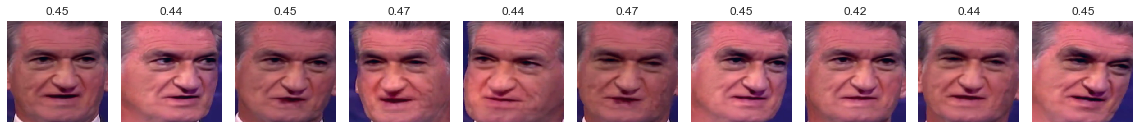

[Extracted 10 faces for file df_106.mp4]
Label: fake
Fake prob: 0.5951252579689026


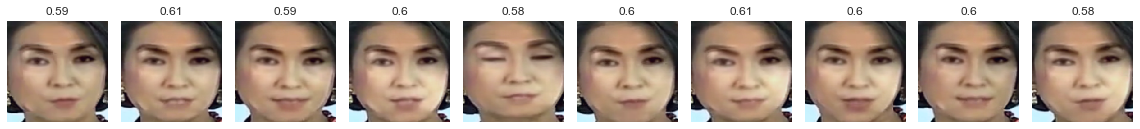

[Extracted 10 faces for file df_110.mp4]
Label: fake
Fake prob: 0.4259604513645172


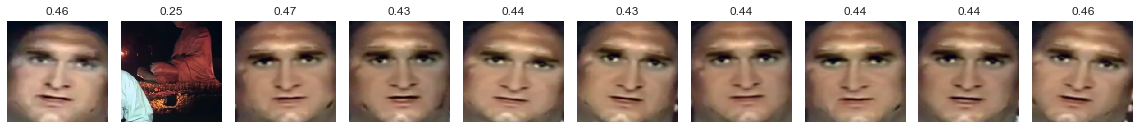

[Extracted 10 faces for file df_111.mp4]
Label: fake
Fake prob: 0.6197780966758728


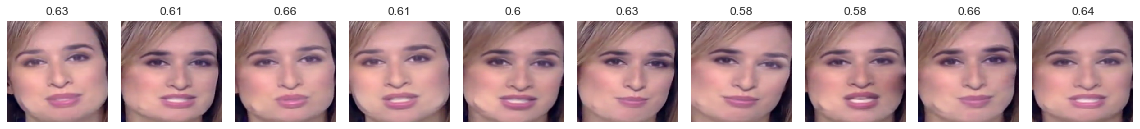

[Extracted 10 faces for file df_19.mp4]
Label: fake
Fake prob: 0.4425453245639801


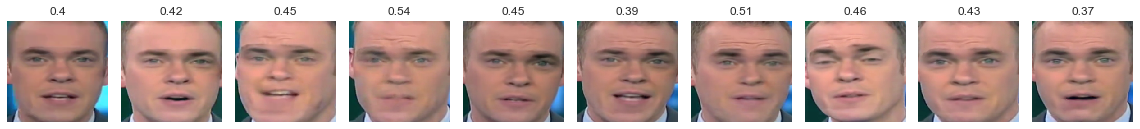

[Extracted 10 faces for file df_4.mp4]
Label: fake
Fake prob: 0.545540452003479


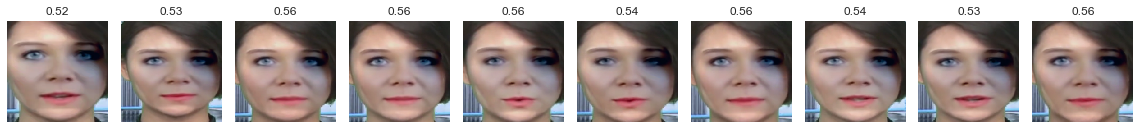

[Extracted 10 faces for file df_45.mp4]
Label: fake
Fake prob: 0.43670159578323364


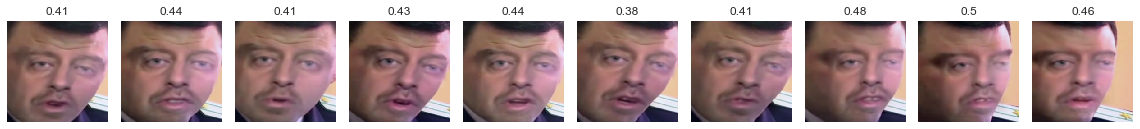

[Extracted 10 faces for file df_47.mp4]
Label: fake
Fake prob: 0.3636721968650818


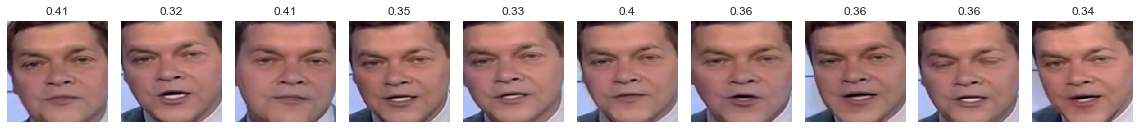

[Extracted 10 faces for file df_53.mp4]
Label: fake
Fake prob: 0.33814144134521484


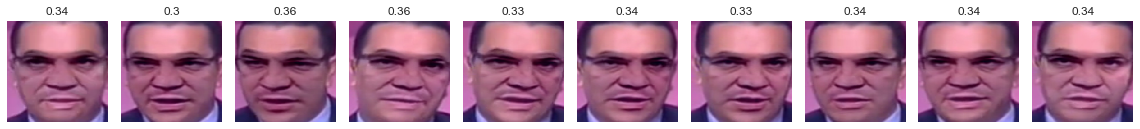

[Extracted 10 faces for file df_56.mp4]
Label: fake
Fake prob: 0.2865177392959595


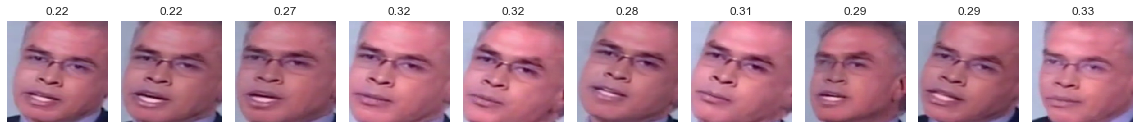

[Extracted 10 faces for file df_57.mp4]
Label: fake
Fake prob: 0.49905118346214294


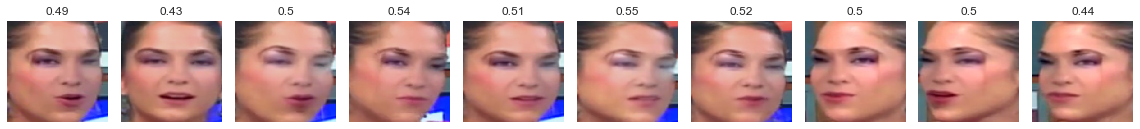

[Extracted 10 faces for file df_62.mp4]
Label: fake
Fake prob: 0.4920395016670227


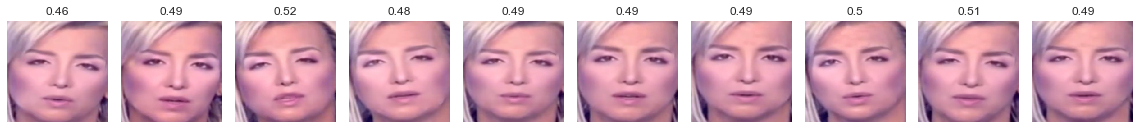

[Extracted 10 faces for file df_71.mp4]
Label: fake
Fake prob: 0.6198267340660095


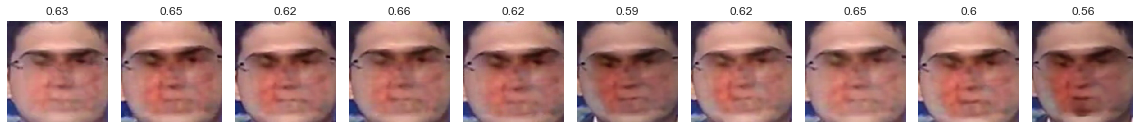

[Extracted 10 faces for file df_72.mp4]
Label: fake
Fake prob: 0.5106367468833923


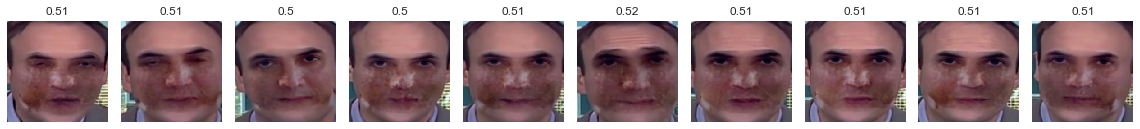

[Extracted 10 faces for file 273.mp4]
Label: real
Fake prob: 0.33236977458000183


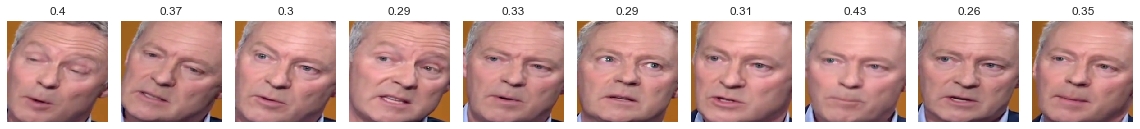

[Extracted 10 faces for file 391.mp4]
Label: real
Fake prob: 0.40463945269584656


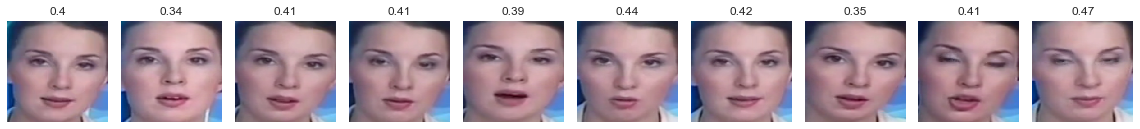

[Extracted 10 faces for file 413.mp4]
Label: real
Fake prob: 0.4894426763057709


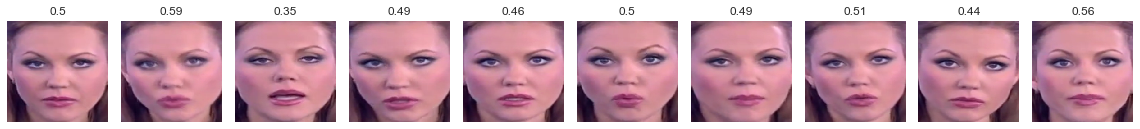

[Extracted 10 faces for file 418.mp4]
Label: real
Fake prob: 0.4735904633998871


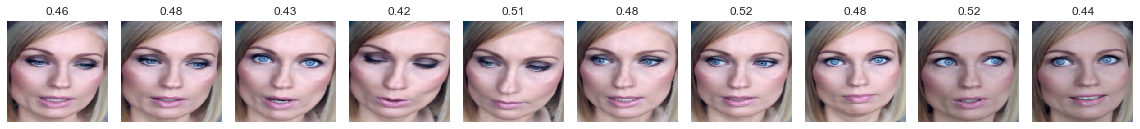

[Extracted 10 faces for file 546.mp4]
Label: real
Fake prob: 0.7886097431182861


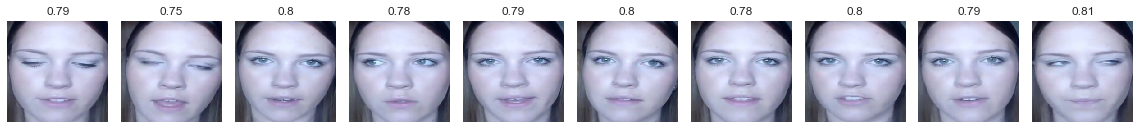

[Extracted 10 faces for file 735.mp4]
Label: real
Fake prob: 0.47250404953956604


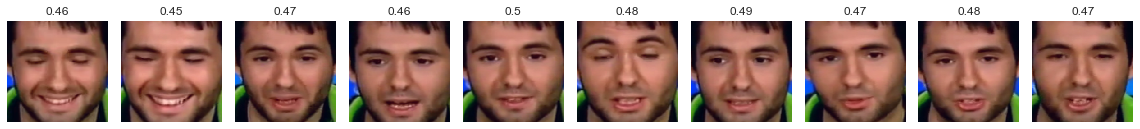

[Extracted 10 faces for file 745.mp4]
Label: real
Fake prob: 0.4026152789592743


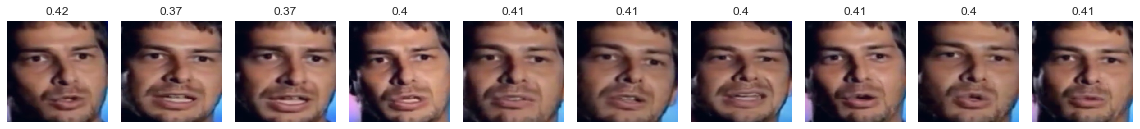

[Extracted 10 faces for file 807.mp4]
Label: real
Fake prob: 0.39057523012161255


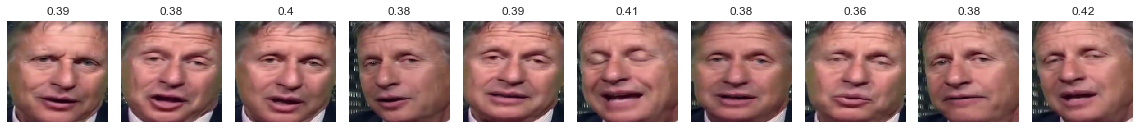

Length labels: 22
Length predictions: 22
Optimal threshold = 0.4920395016670227
Confusion matrix for threshold None
[[7 1]
 [9 5]]
[Acc: 0.545]
[Precision: 0.833]
[Recall: 0.357]
[F1: 0.5]


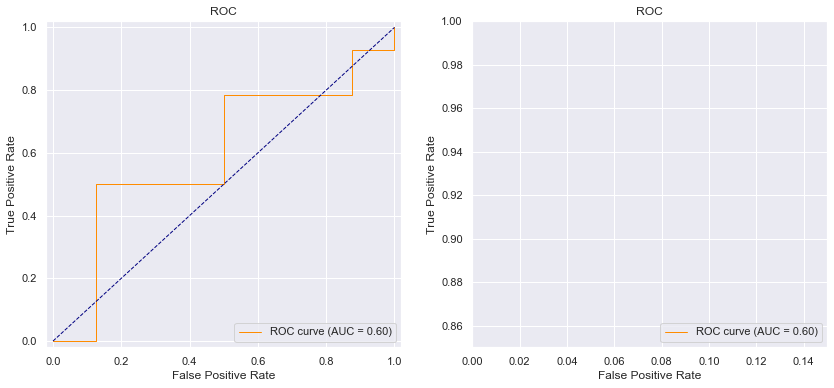

In [5]:
predict_files(model=model,
              path=file_path,
              n_frames=n_frames,
              device=device,
              agg='mean',
              temporal=temporal,
              plot_ims=True,
              threshold=None,
              verbose=True,
              log_metrics=False)


